<a href="https://colab.research.google.com/github/santhoshi-h/datasets/blob/main/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uber Data Analysis

Data loaded successfully!


<ipython-input-2-c5097d0b9238>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=uber_data, palette='viridis')


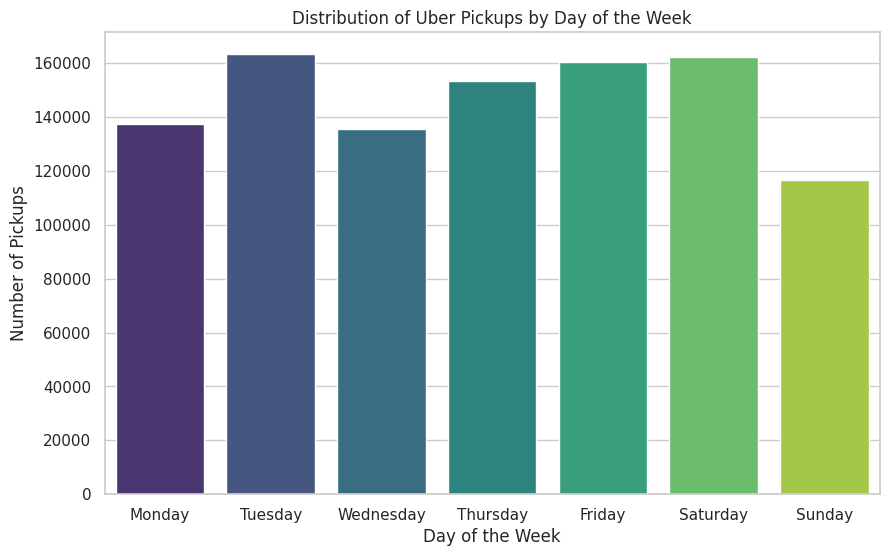

<ipython-input-2-c5097d0b9238>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=uber_data, palette='viridis')


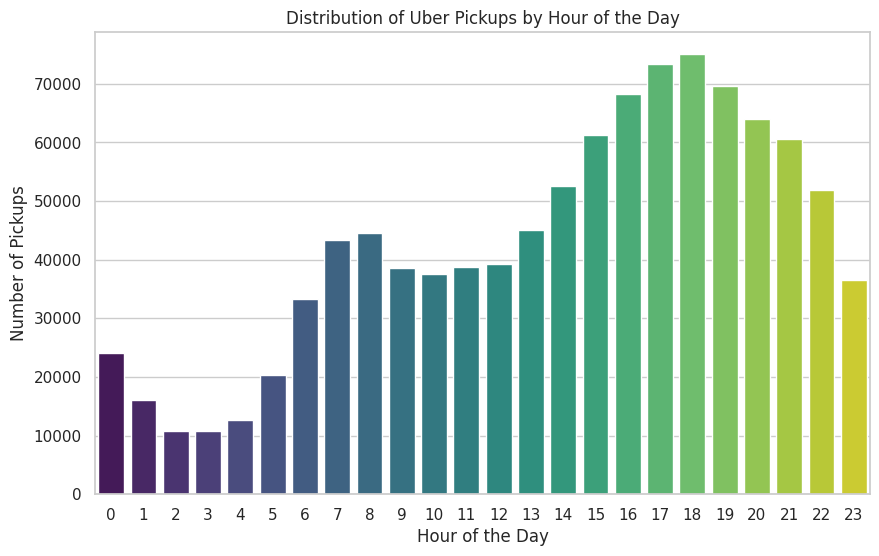

In [2]:
import pandas as pd

file_path = '/content/uber-raw-data-sep14.csv.zip'

# Load the dataset with error handling
try:
    uber_data = pd.read_csv(file_path, on_bad_lines='skip')
    print("Data loaded successfully!")
except pd.errors.ParserError as e:
    print(f"Error loading data: {e}")

# Proceed with the rest of the analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Date/Time' column to datetime format
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format='%m/%d/%Y %H:%M:%S', errors='coerce')

# Drop rows with NaT in 'Date/Time'
uber_data = uber_data.dropna(subset=['Date/Time'])

# Extract additional time-related features
uber_data['Year'] = uber_data['Date/Time'].dt.year
uber_data['Month'] = uber_data['Date/Time'].dt.month
uber_data['Day'] = uber_data['Date/Time'].dt.day
uber_data['Hour'] = uber_data['Date/Time'].dt.hour
uber_data['Minute'] = uber_data['Date/Time'].dt.minute
uber_data['DayOfWeek'] = uber_data['Date/Time'].dt.dayofweek

# Set up the visualisation style
sns.set(style="whitegrid")

# Plot the distribution of pickups by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=uber_data, palette='viridis')
plt.title('Distribution of Uber Pickups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

# Plot the distribution of pickups by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=uber_data, palette='viridis')
plt.title('Distribution of Uber Pickups by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()
